# DSCI 408/508 - Team Capstone Project - Part 1
### By Eric Cowen, Clay Bruner, Tyler Dreiling, and Sam Risenhoover

#### Preliminary Analysis
Load in necessary package(s) for this notebook

In [1]:
if(!require("ggplot2")) install.packages("ggplot2")
if(!require("gridExtra")) install.packages("gridExtra")
if (!require('factoextra')) install.packages('factoextra')
library(ggplot2)
library(gridExtra)
library(factoextra)

Loading required package: ggplot2

Loading required package: gridExtra

Warning message:
"package 'gridExtra' was built under R version 4.0.3"
Loading required package: factoextra

Warning message:
"package 'factoextra' was built under R version 4.0.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Now, let's load in our raw data.

In [3]:
setwd("C:/Users/Clay/Downloads")
#Load in data
CollegeRookieStats <- read.csv("CollegeRookieStats.csv")
#Change column names
colnames(CollegeRookieStats) <- c("ID","Name","College","G","MP","FG","FGA","FGP","P2","P2A","P2P","P3","P3A","P3P","FT","FTA","FTP","TRB","AST","STL","BLK","TOV","PF","PTS","SOS","NBATRB","NBAAST","NBASTL","NBABLK","NBAPTS","DraftPick","NBATeam","DraftYear","Position")
#Adjust the ID column
CollegeRookieStats$ID <- 1:nrow(CollegeRookieStats)
#Print the raw data
t(head(CollegeRookieStats,14))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Name,Kenyon Martin,Stromile Swift,Marcus Fizer,Mike Miller,DerMarr Johnson,Chris Mihm,Jamal Crawford,Keyon Dooling,Jerome Moiso,Mateen Cleaves,Desmond Mason,Quentin Richardson,Speedy Claxton,Morris Peterson
College,Cincinnati,LSU,Iowa State,Florida,Cincinnati,Texas,Michigan,Missouri,UCLA,Michigan State,Oklahoma State,DePaul,Hofstra,Michigan State
G,116,50,97,65,32,96,17,59,62,123,129,64,119,137
MP,23.7,26.6,32.9,26.7,27.5,31.4,33.9,28.1,26.8,29.6,30.0,34.2,33.8,23.4
FG,4.4,5.1,7.1,4.5,4.4,5.2,6.2,3.8,4.9,4.4,4.8,6.3,5.9,4.1
FGA,7.5,9.0,13.9,9.2,9.2,10.4,15.0,9.2,9.8,10.8,9.8,14.0,12.6,8.5
FGP,0.586,0.560,0.511,0.483,0.478,0.497,0.412,0.411,0.495,0.406,0.486,0.454,0.468,0.484
P2,4.4,4.9,6.9,3.3,2.8,5.1,4.2,2.6,4.8,3.2,3.8,4.5,5.4,3.0
P2A,7.5,8.4,13.2,5.8,4.8,10.1,9.1,5.8,9.5,7.1,7.1,9.0,10.9,5.6


Lets observe boxplots of the following numeric variables: **G**, **MP**, **FG**, **FGA**, **FGP**, **P2**, **P2A**, **P2P**, **P3**, **P3A**, **P3P**, **FT**, **FTA**, **FTP**, **TRB**, **AST**, **STL**, **BLK**, **TOV**, **PF**, **PTS**, **SOS**, **NBATRB**, **NBAAST**, **NBASTL**, **NBABLK**, and **NBAPTS**.

This will help us observe outliers, and normalize the data.

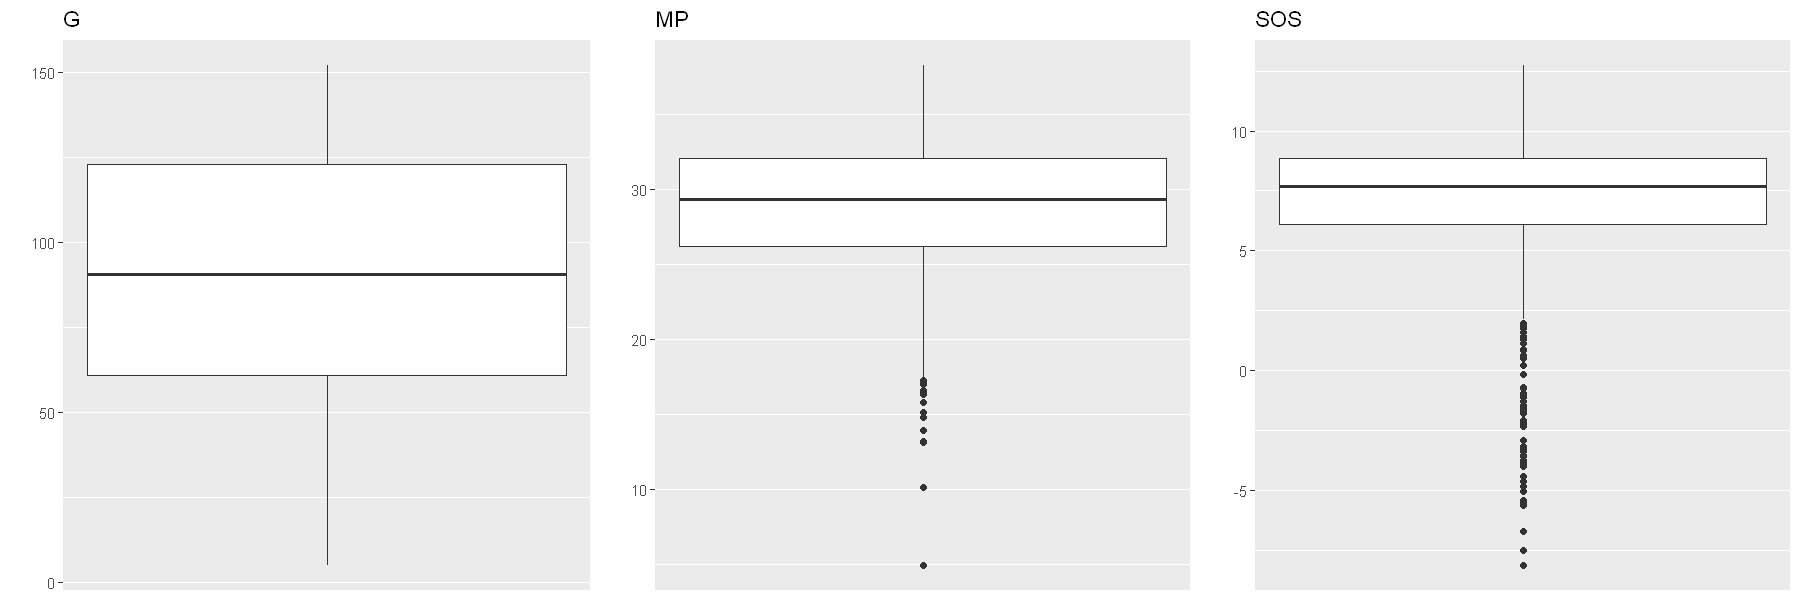

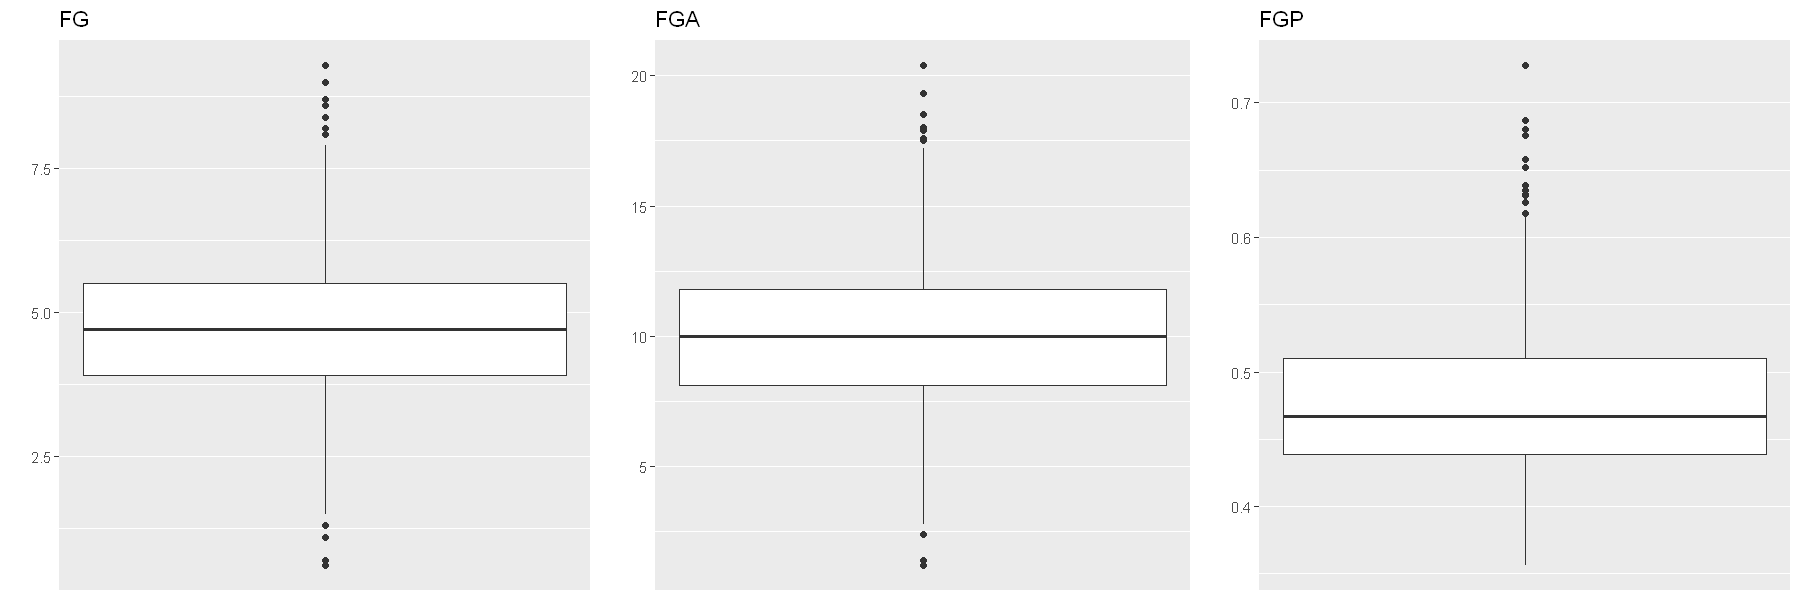

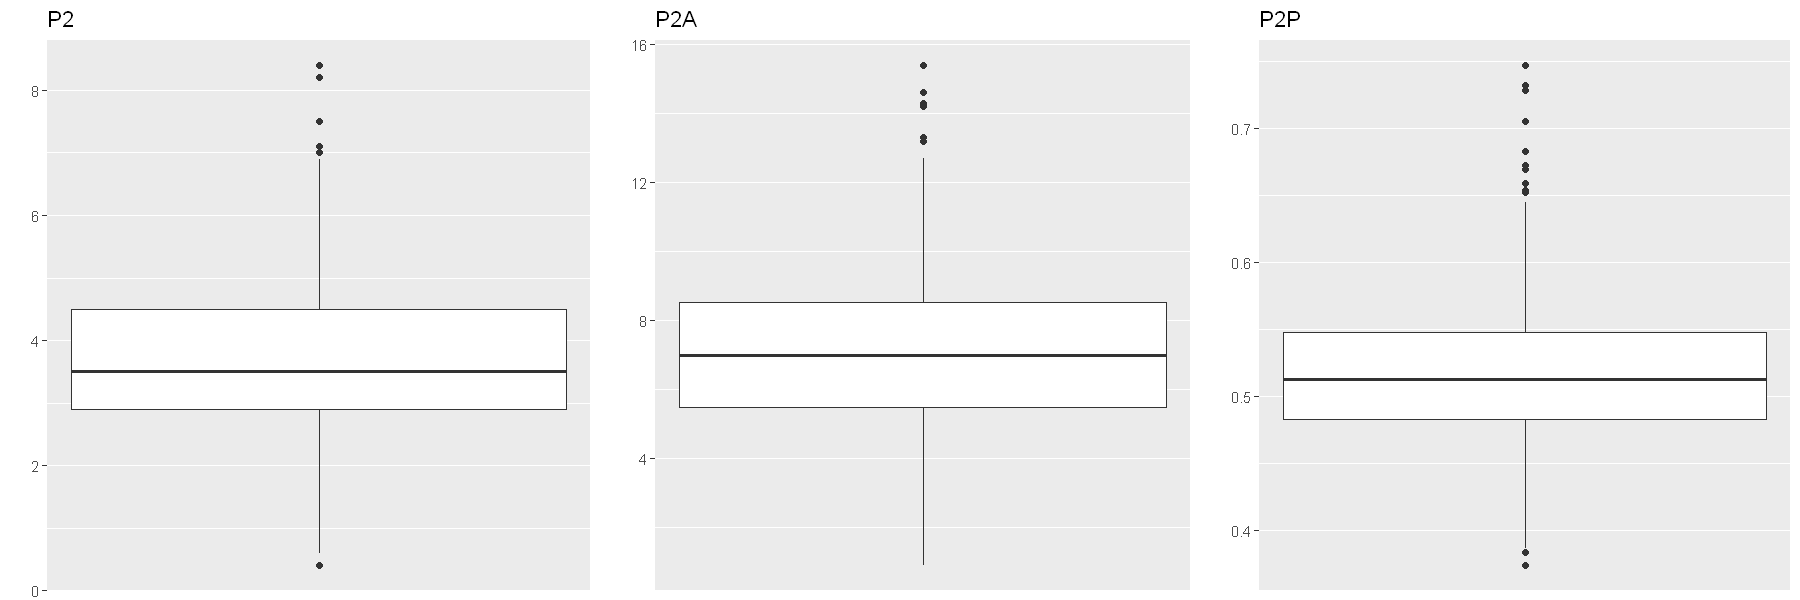

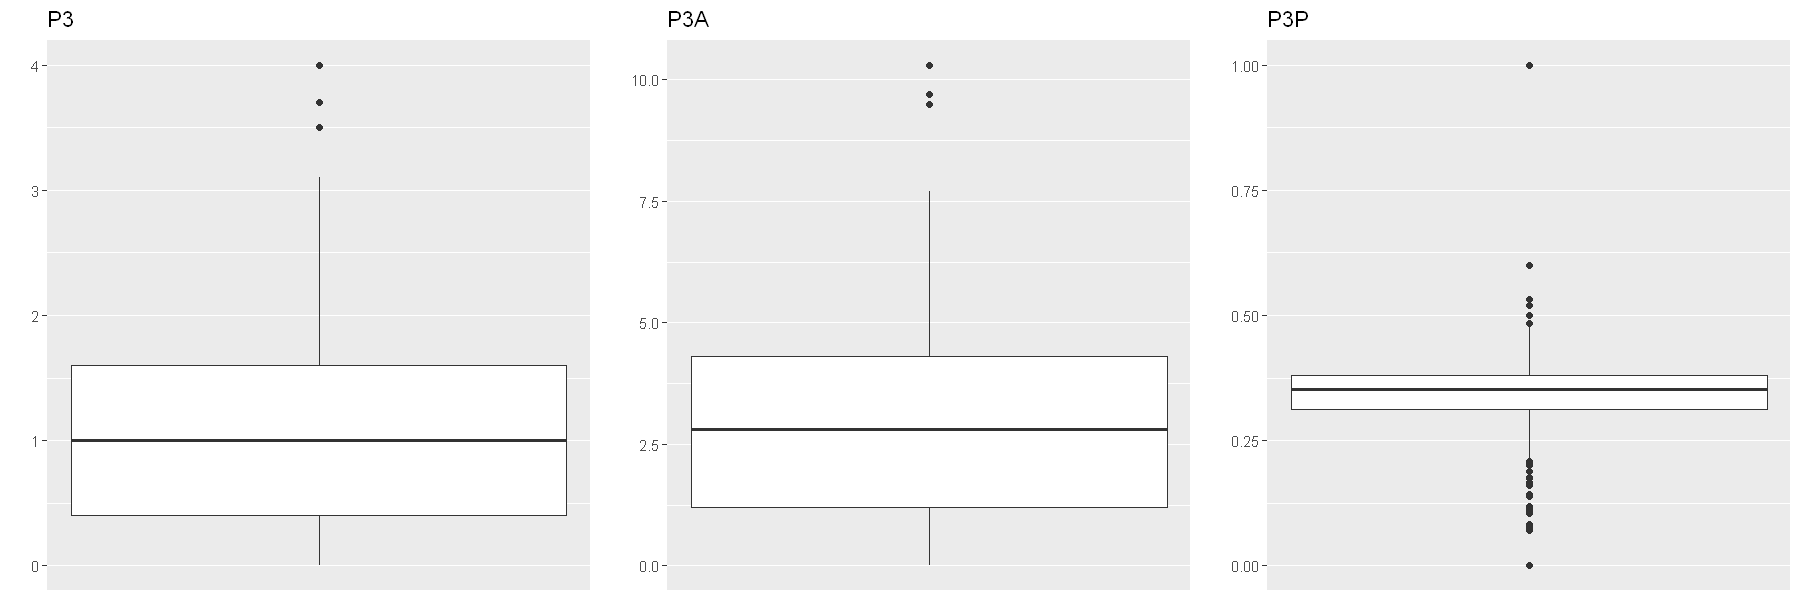

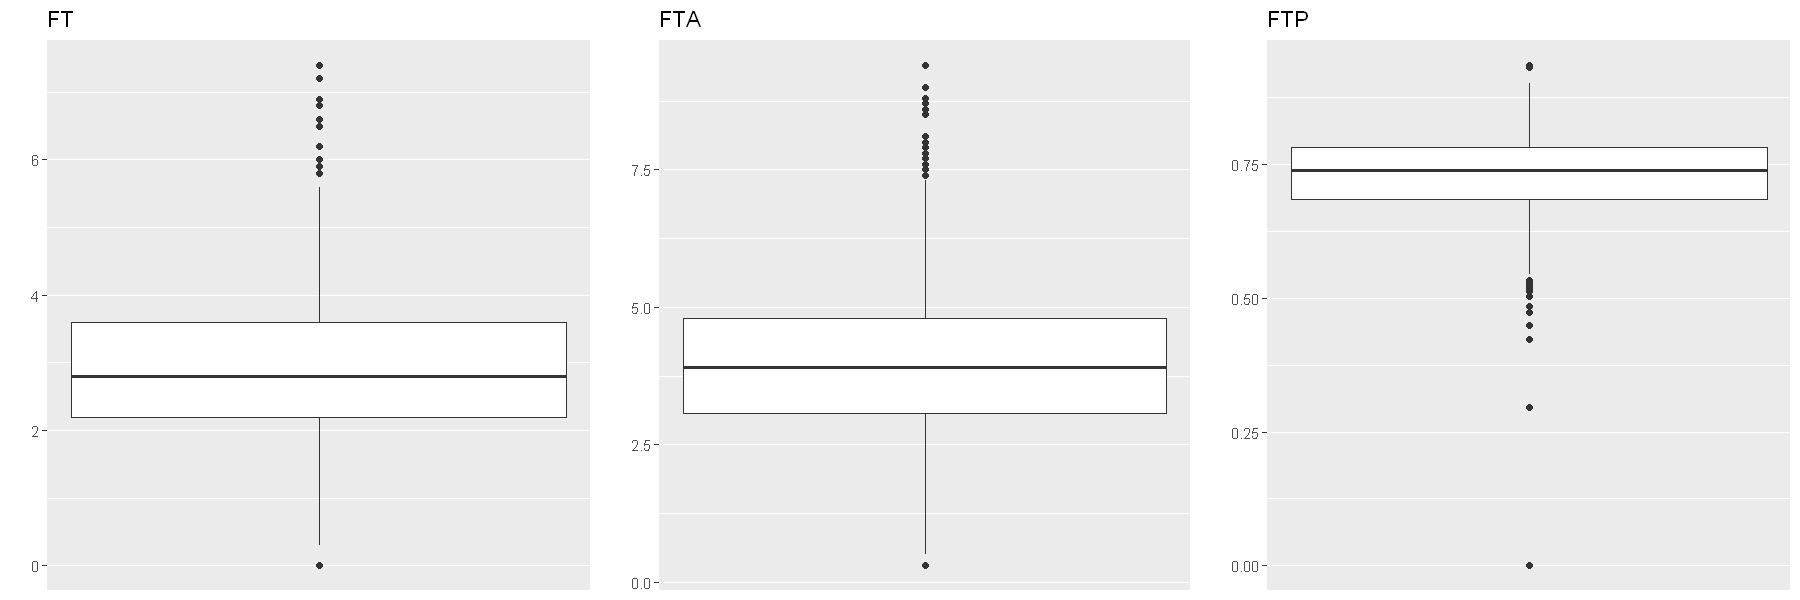

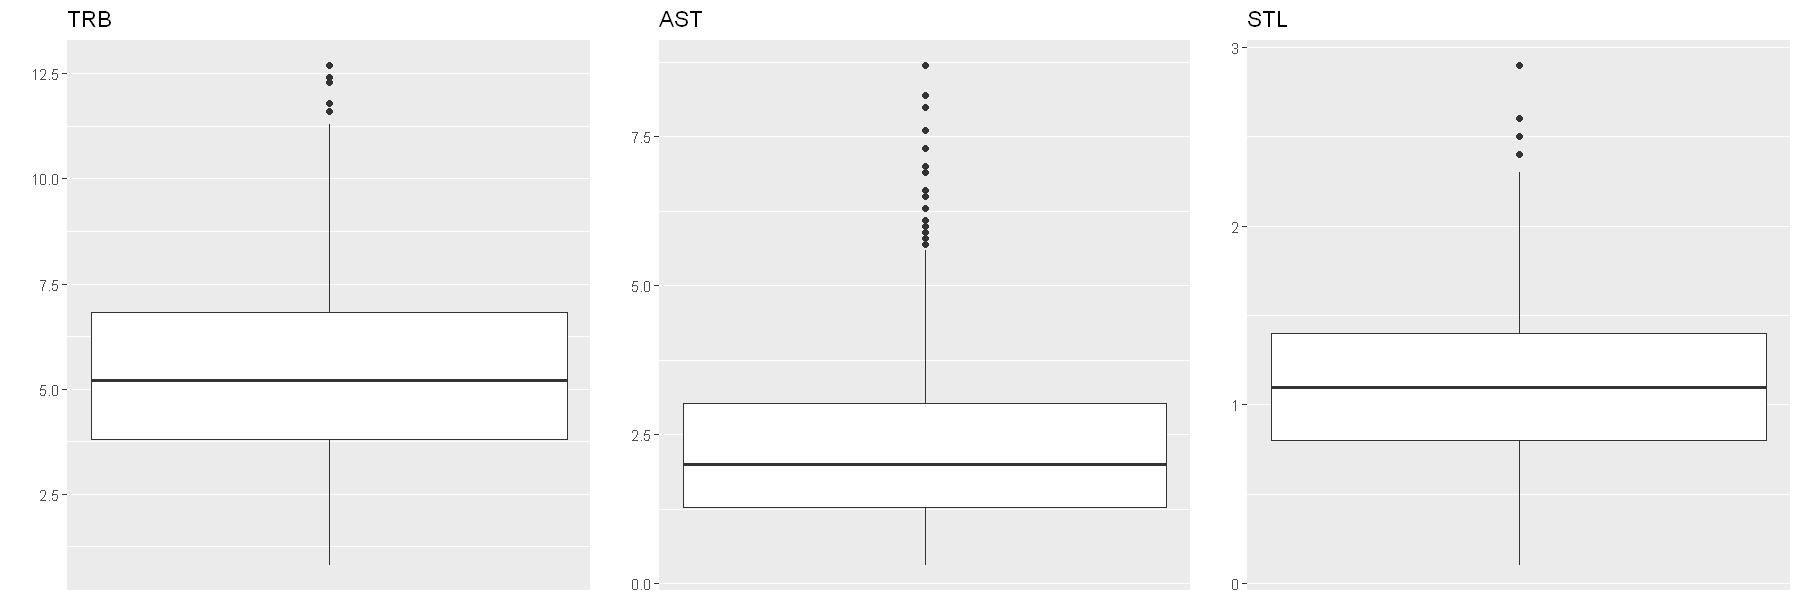

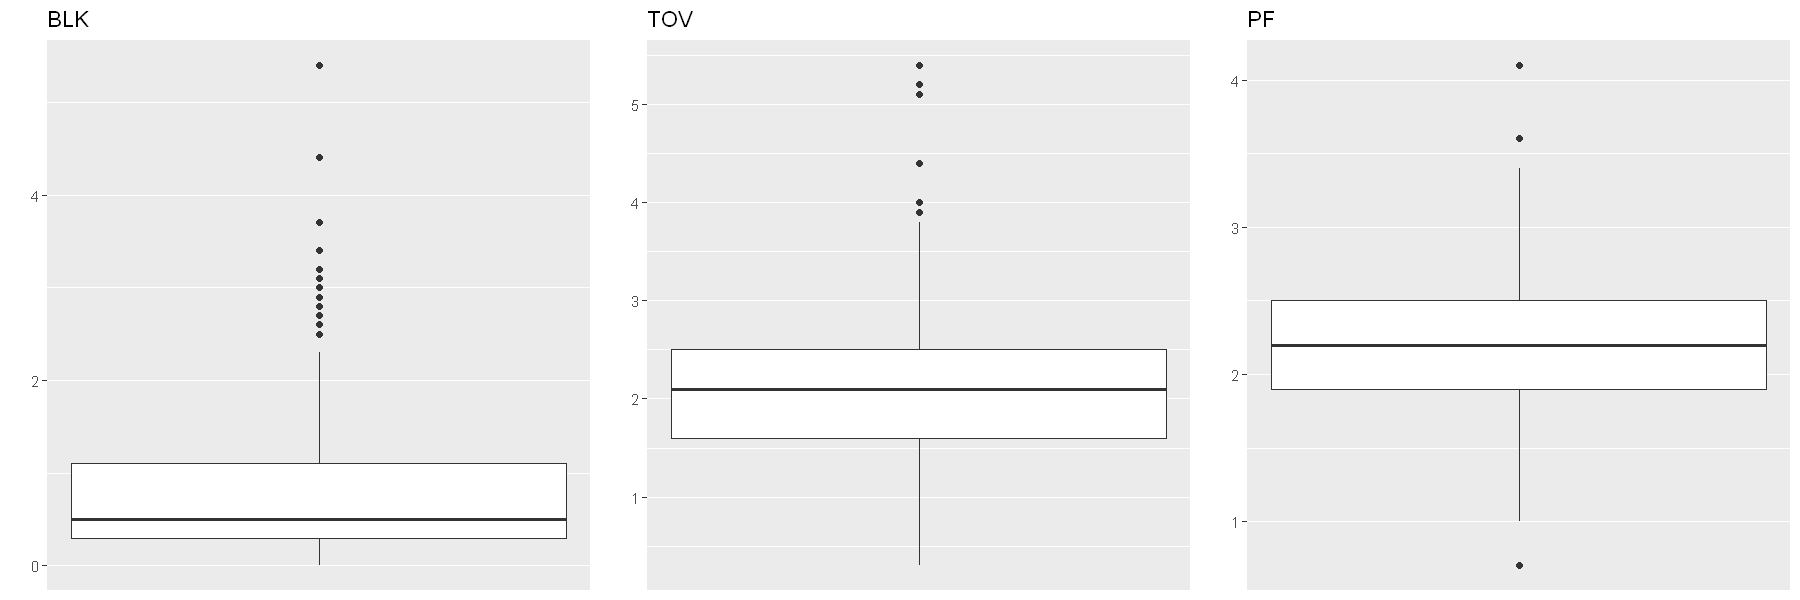

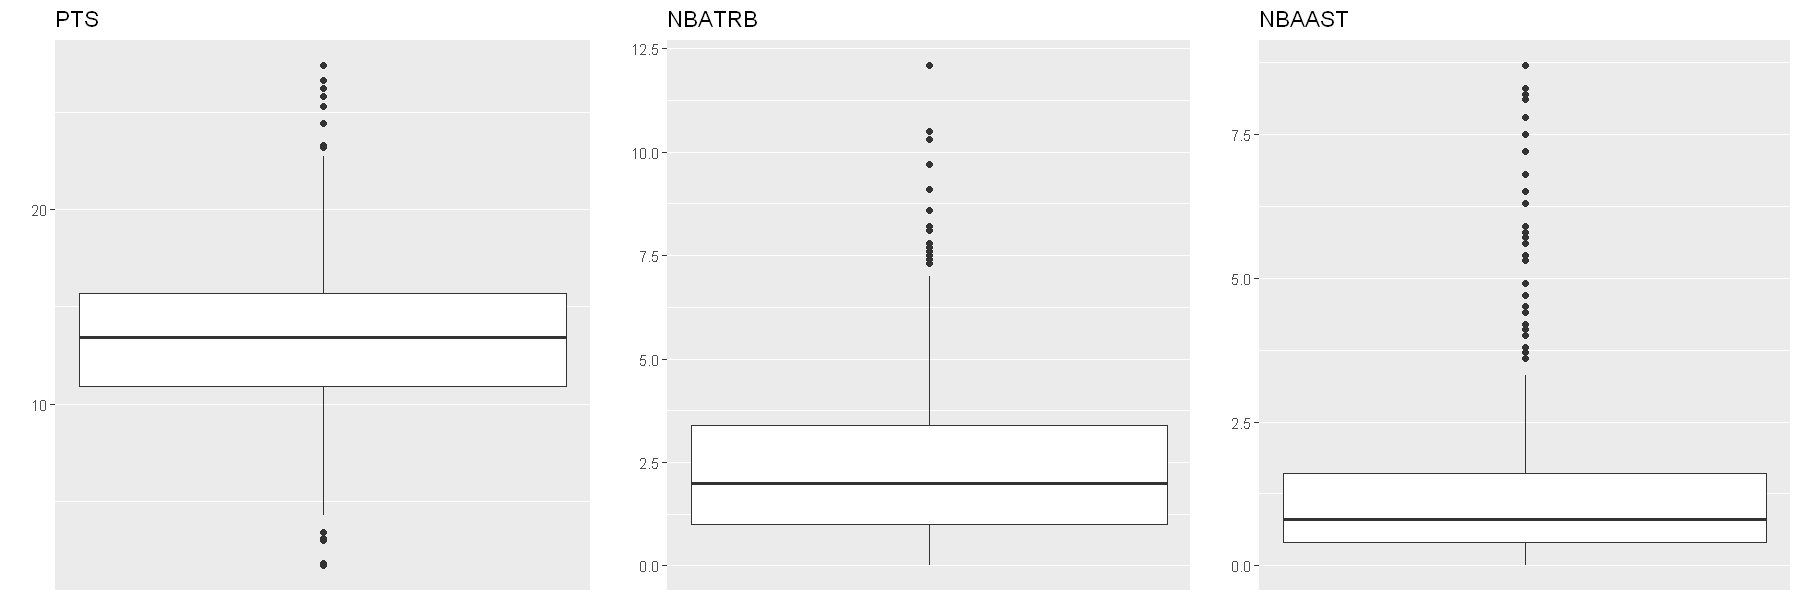

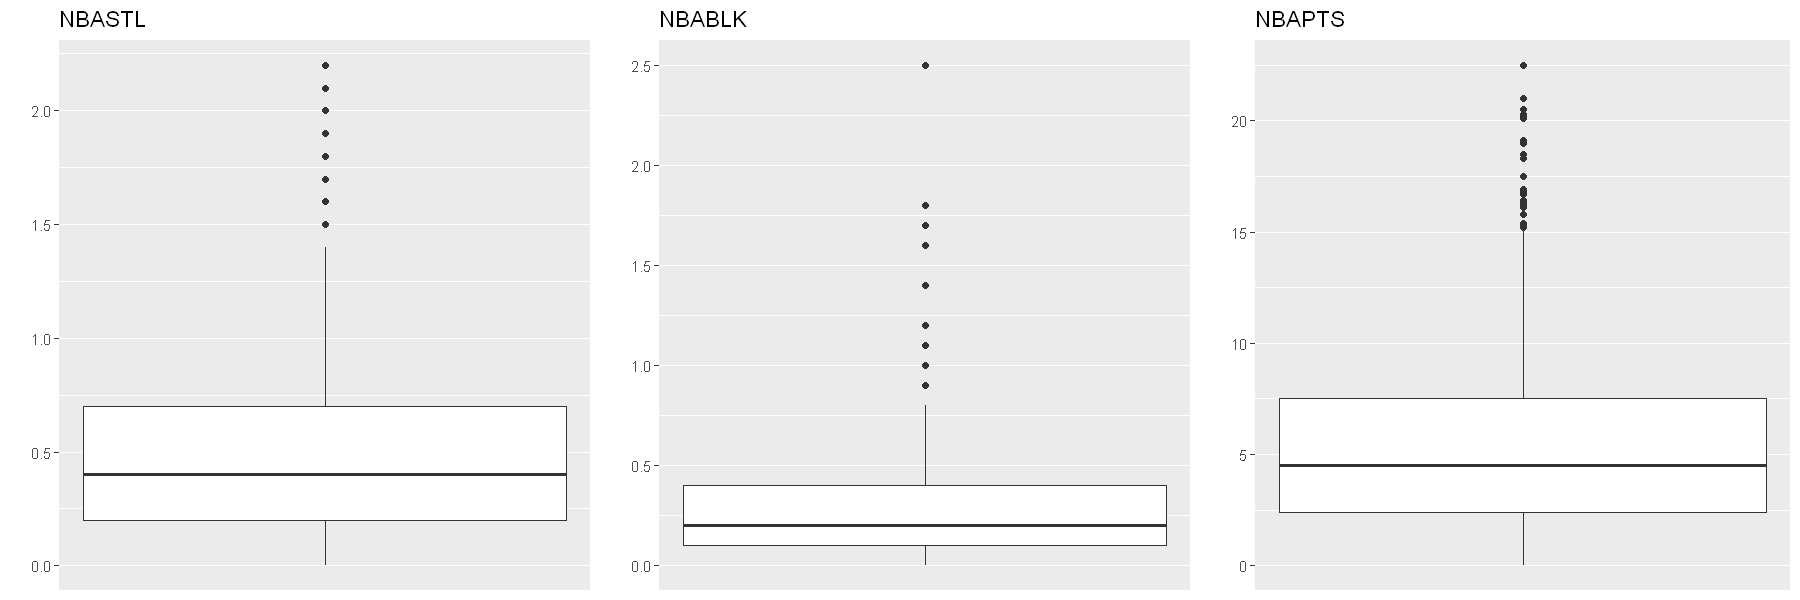

In [4]:
#Select the boxplot data
boxplot.data <- CollegeRookieStats[,c("G","MP","SOS","FG","FGA","FGP","P2","P2A","P2P","P3","P3A","P3P","FT","FTA","FTP","TRB","AST","STL","BLK","TOV","PF","PTS","NBATRB","NBAAST","NBASTL","NBABLK","NBAPTS")]
n <- ncol(boxplot.data)
  boxplots <- list()
  i <- 1
  while(i <= n){
    plot.data <- data.frame(as.numeric(boxplot.data[,i]))
    title <- colnames(boxplot.data)[i]
    colnames(plot.data) <- "Value"
    
    b <- ggplot(plot.data, aes(y=Value)) + geom_boxplot() + ggtitle(title) + 
      scale_x_continuous(breaks=1,labels=c("")) + ylab("")
    boxplots[[i]] <- b
    
    i <- i + 1
  }

#Print boxplots
k <- 1
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)

There seems to be some outliers present in the data in **P3P** and **FTP**. 

Let's observe the records.

In [5]:
max.p3p <- which(CollegeRookieStats$P3P==max(CollegeRookieStats$P3P))
min.ftp <- which(CollegeRookieStats$FTP==min(CollegeRookieStats$FTP))
ref <- unique(c(max.p3p,min.ftp))
t(CollegeRookieStats[ref,])

,164,191,237,418,479,447
ID,164,191,237,418,479,447
Name,Tyrus Thomas,Ryan Hollins,Roy Hibbert,Jeff Withey,Chris McCullough,Joe Harris
College,LSU,UCLA,Georgetown,Kansas,Syracuse,Central Arkansas
G,32,113,136,117,16,15
MP,25.9,20.2,23.3,19.8,28.1,10.1
FG,4.8,2.0,4.2,2.8,3.4,1.3
FGA,7.8,3.5,7.0,4.9,7.1,2.8
FGP,0.608,0.575,0.603,0.568,0.478,0.452
P2,4.7,2.0,4.2,2.8,3.3,0.7
P2A,7.8,3.5,7.0,4.9,7.0,1.2


It looks like most of the **P3P** that are 100% are because **P3** and **P3A** are both zero. Let's change these percentages to 0%. We can assume that this same thing is happening for **FGP**, **P2P**, and **FTP**. We must change these columns as well.

For records Chris McCullough and Joe Harris, we will want to change those values to bring them closer to the distribution. For Chris McCullough we will replace his Three-Pointer Percentage with the mean. For Joe Harris, we will replace his Free-Throw Percentage with the 25th percentile.

#### Encoding the Data

Once we change those data entries, we will want to standardize the data using 
$$x'=\frac{x-mean}{sd}$$ where $x'$ is the standardized value.

Then, we scale the date using
$$x''=\frac{x'-min}{max-min}$$ where $x''$ is the standardized and scaled value

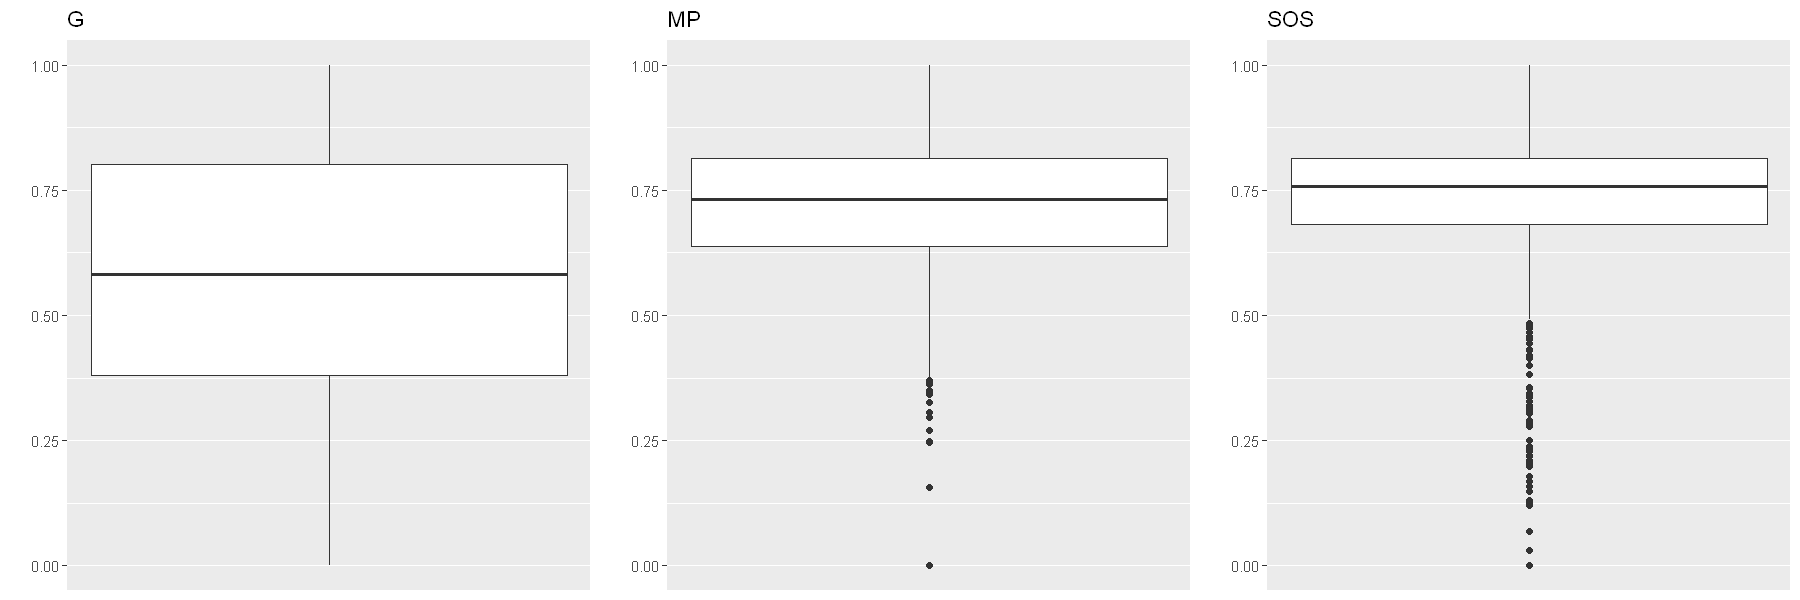

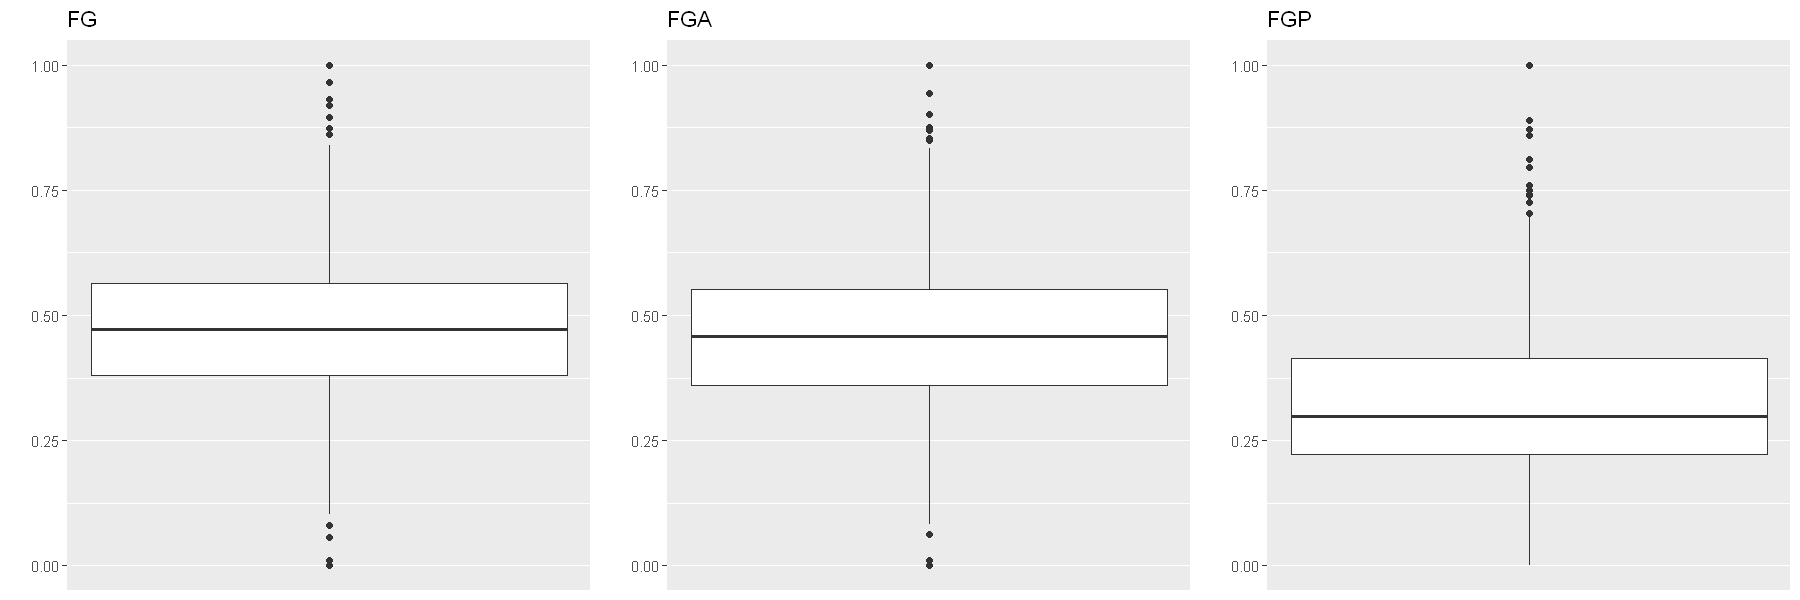

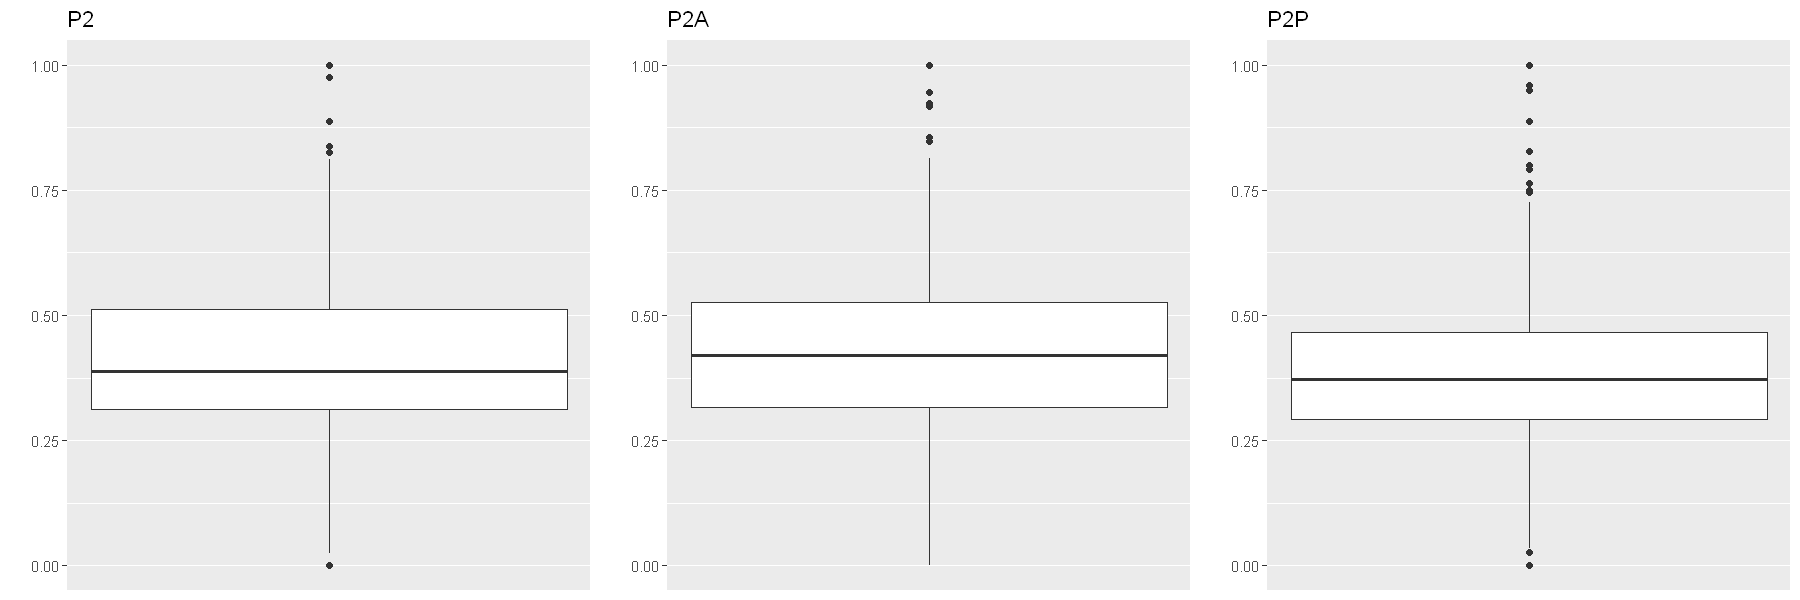

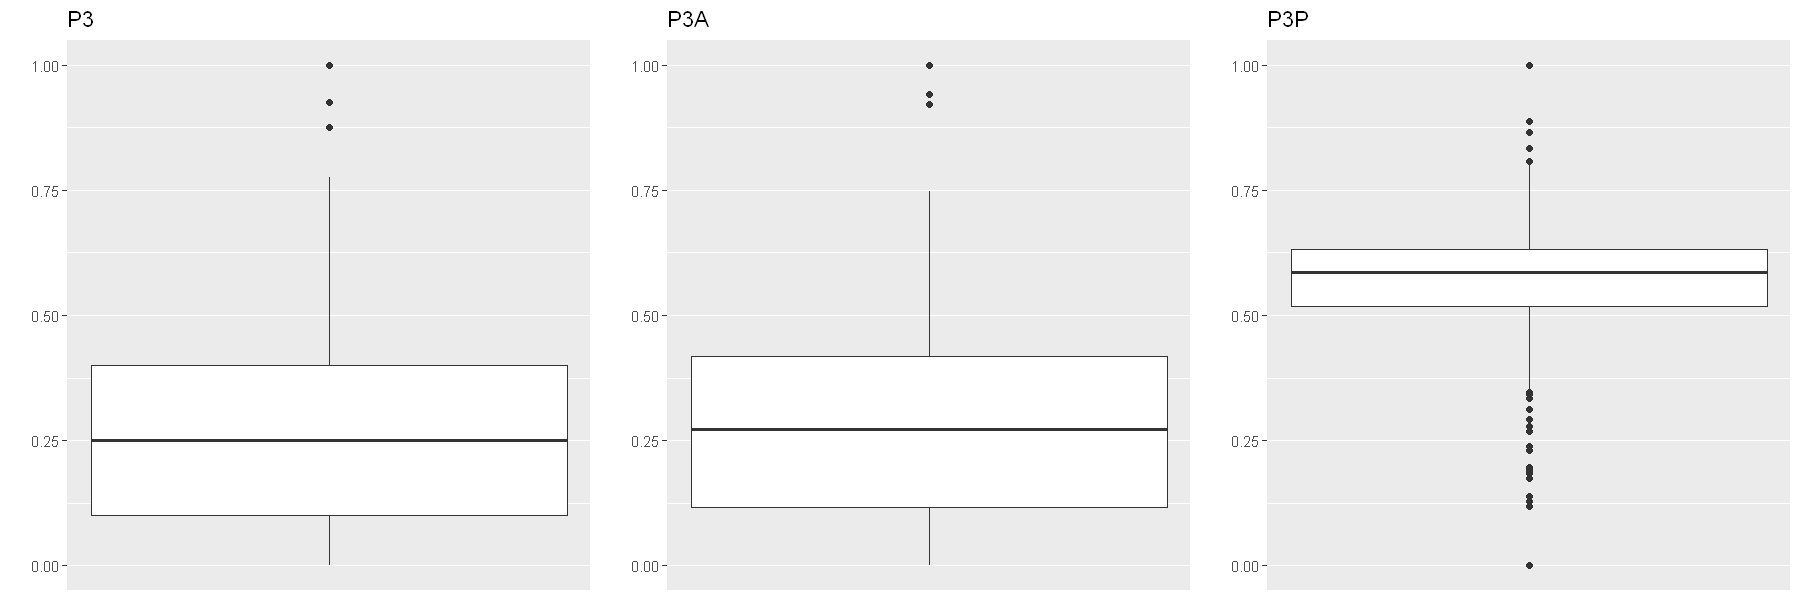

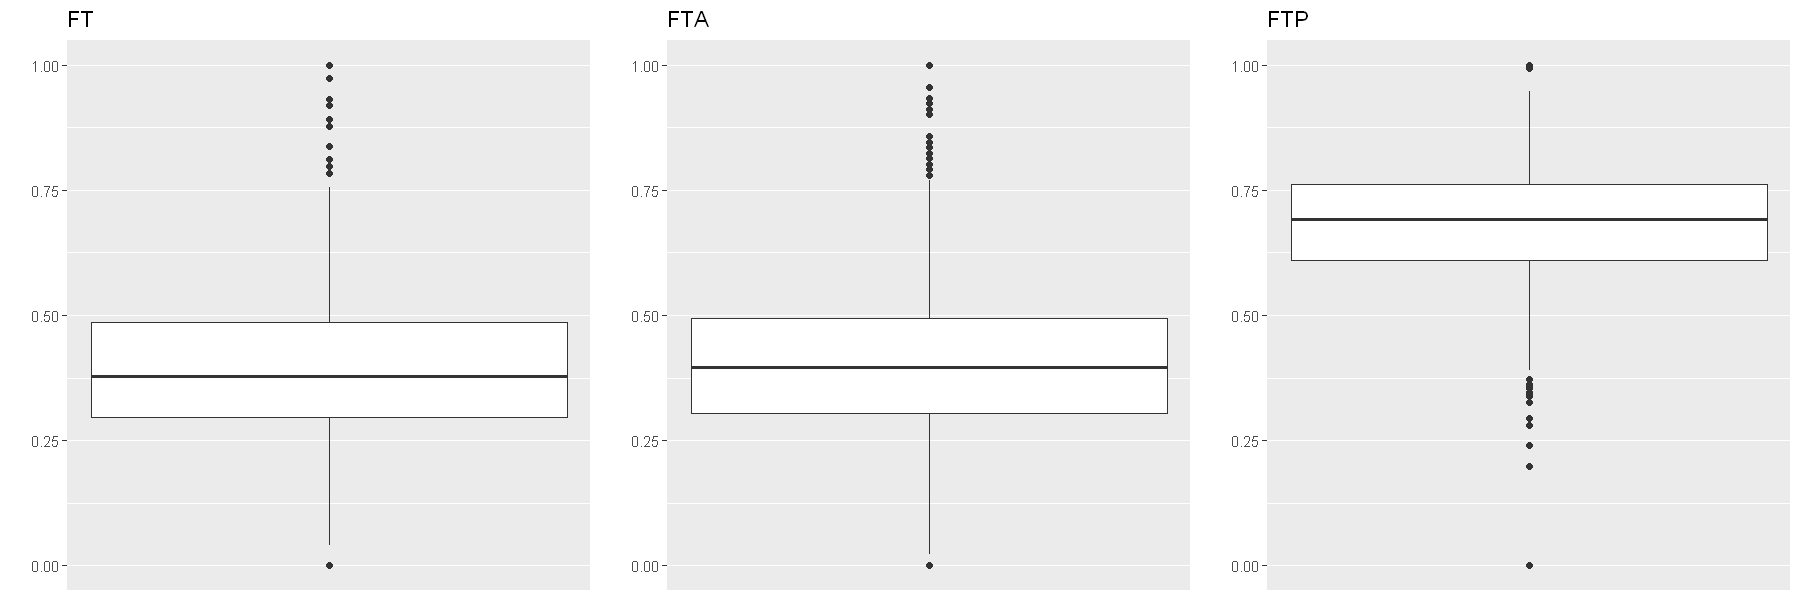

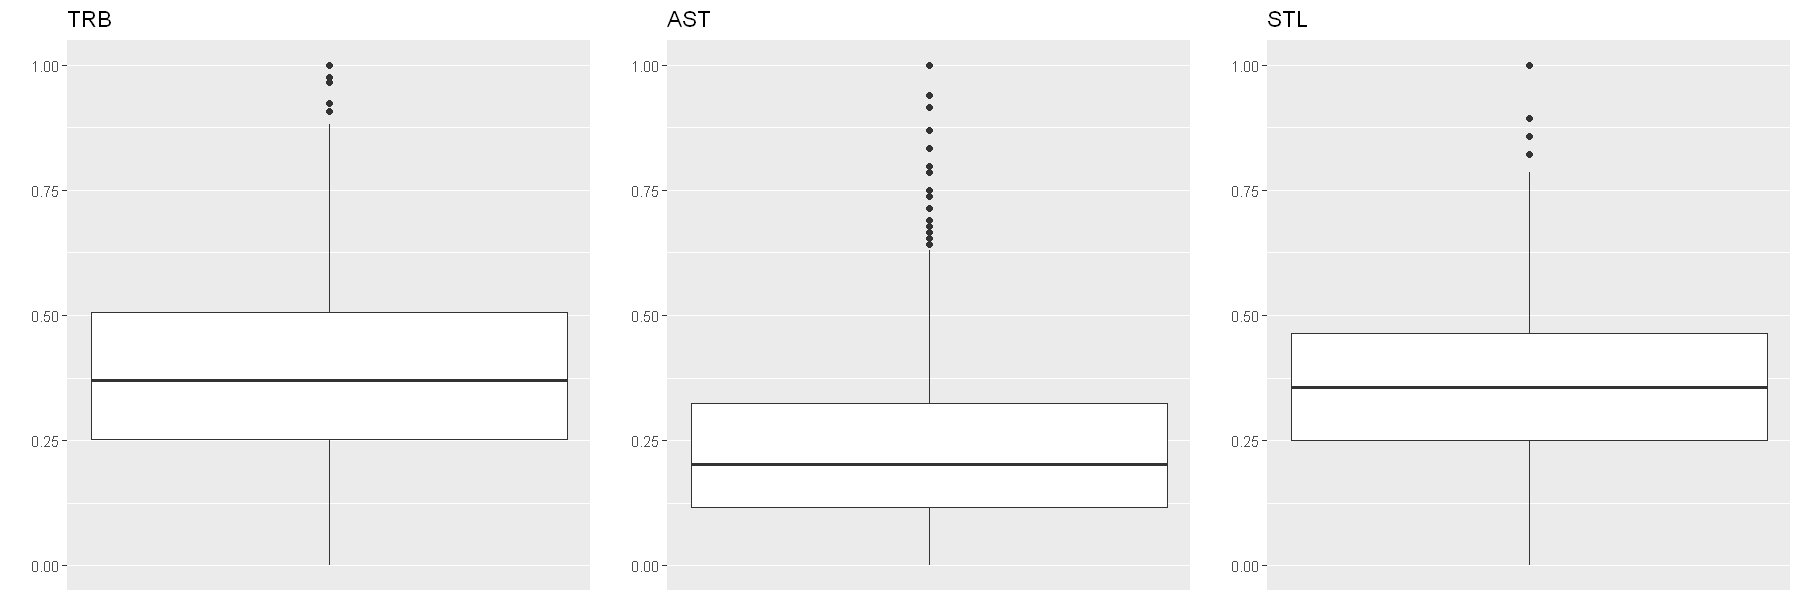

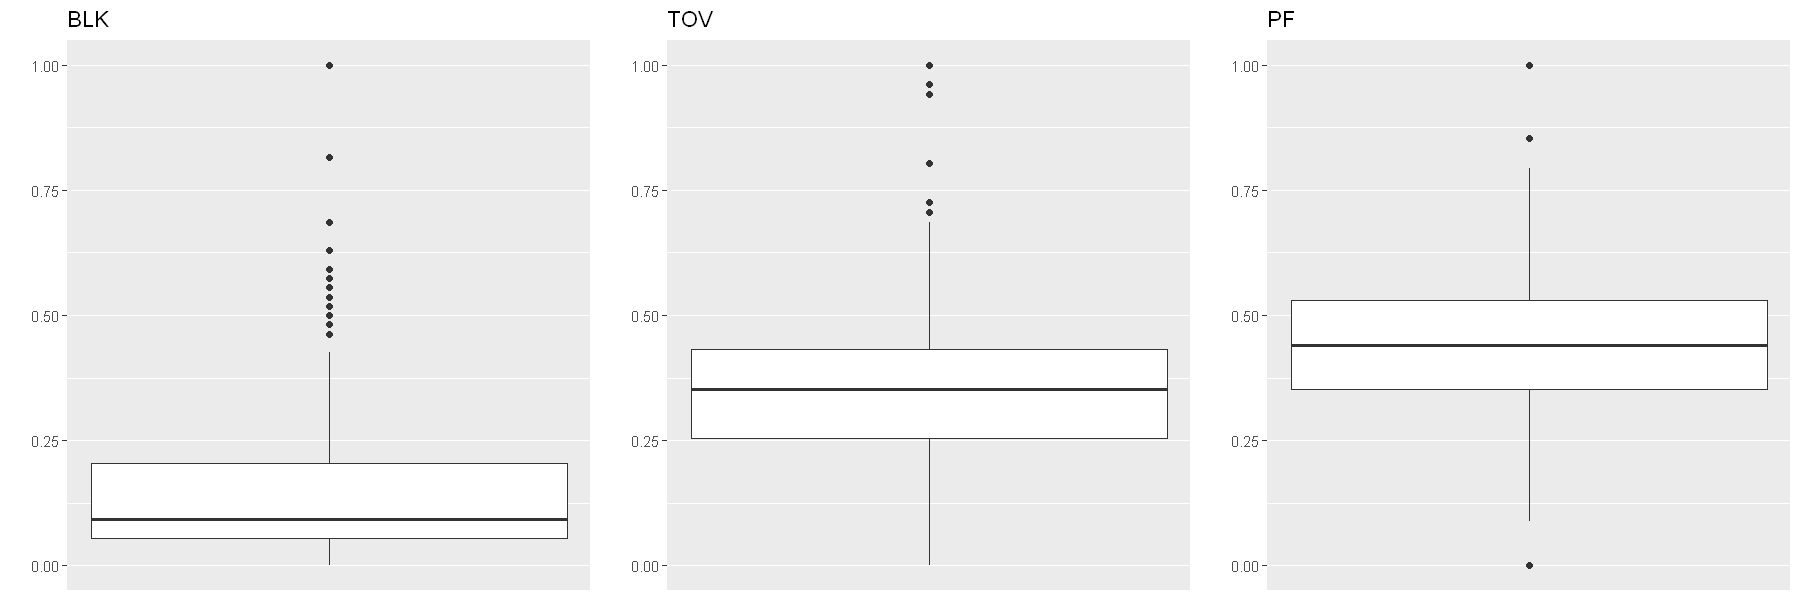

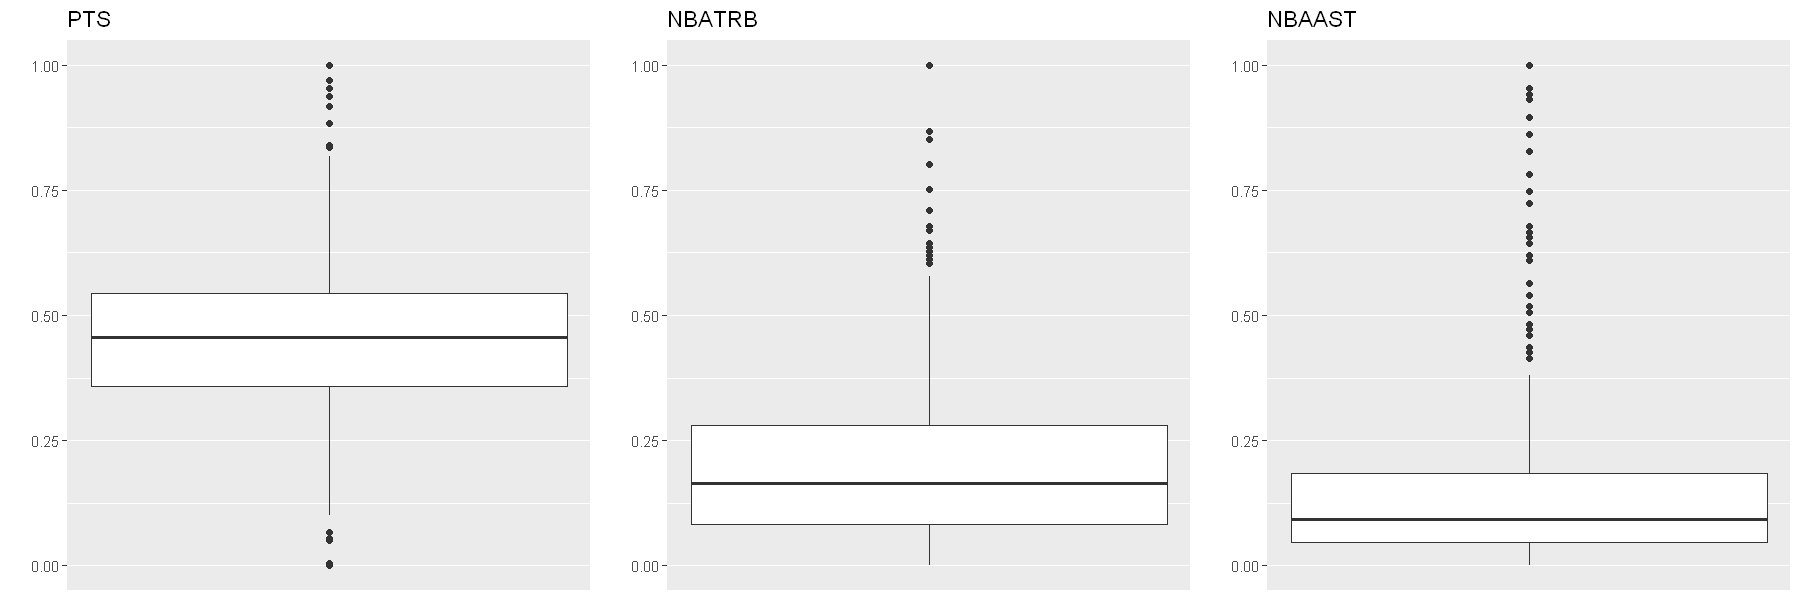

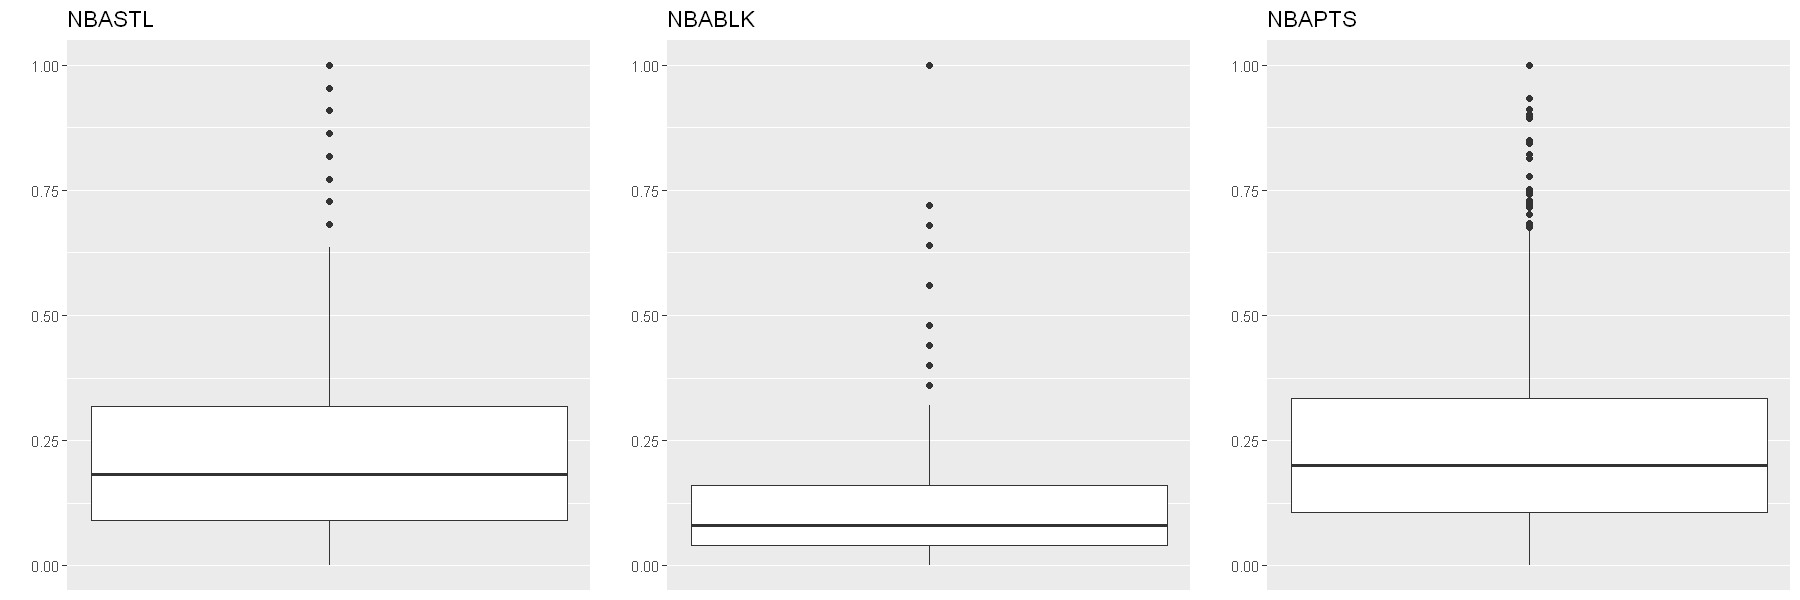

In [6]:
#Change the records for percentange features
CollegeRookieStats.standardized <- CollegeRookieStats
change <- c("FGP","P2P","P3P","FTP")
check <-  c("FG","P2","P3","FT")
for(i in 1:length(change)){
    col1 <- CollegeRookieStats.standardized[,change[i]]
    col2 <- CollegeRookieStats.standardized[,check[i]]
    max.perc <- which(col1 == 1)
    min.chk <- which(col2 == 0)
    chg.ref <- intersect(max.perc,min.chk)
    CollegeRookieStats.standardized[chg.ref,change[i]] <- 0
}

#Change the records for Chris McCullough and Joe Harris
CM <- which(CollegeRookieStats.standardized$Name=="Chris McCullough")
CollegeRookieStats.standardized[CM,"P3P"] <- mean(CollegeRookieStats.standardized[-CM,"P3P"])
JH <- which(CollegeRookieStats.standardized$Name=="Joe Harris")
CollegeRookieStats.standardized[JH,"FTP"] <- quantile(CollegeRookieStats.standardized[-CM,"FTP"],prob=0.25)

#Standardize the data
stand <- colnames(boxplot.data)
for(i in 1:length(stand)){
    col <- CollegeRookieStats.standardized[,stand[i]]
    col <- (col-mean(col))/sd(col)
    col <- (col-min(col))/(max(col)-min(col))
    CollegeRookieStats.standardized[,stand[i]] <- col
}

#Select the boxplot data
boxplot.data <- CollegeRookieStats.standardized[,c("G","MP","SOS","FG","FGA","FGP","P2","P2A","P2P","P3","P3A","P3P","FT","FTA","FTP","TRB","AST","STL","BLK","TOV","PF","PTS","NBATRB","NBAAST","NBASTL","NBABLK","NBAPTS")]
n <- ncol(boxplot.data)
  boxplots <- list()
  i <- 1
  while(i <= n){
    plot.data <- data.frame(as.numeric(boxplot.data[,i]))
    title <- colnames(boxplot.data)[i]
    colnames(plot.data) <- "Value"
    
    b <- ggplot(plot.data, aes(y=Value)) + geom_boxplot() + ggtitle(title) + 
      scale_x_continuous(breaks=1,labels=c("")) + ylab("")
    boxplots[[i]] <- b
    
    i <- i + 1
  }

#Print boxplots
k <- 1
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)
k <- k + 3
options(repr.plot.width=15, repr.plot.height=5)
grid.arrange(boxplots[[k]],boxplots[[k+1]],boxplots[[k+2]],ncol=3)

The numerical data looks like it is standardized.

For the other columns, we do not need to mess with **ID**, **Name**, **College**, **NBATeam**, and **DraftYear**. We will keep these in our data because it can filter the data in ways that we will want to view later. For **DraftPick**, we will want convert these ranking in groups of *Top 10*, *Top 11-20*, *etc.*. However, we will encode them as ordinal data or as *1*, *2*, *etc.*, respectively. Then, we scale it. For **Position**, we will use One Hot Encoding (OHE).

In [7]:
#Add a column for Draft Range
CollegeRookieStats.standardized$DraftRange <- (6-((CollegeRookieStats.standardized$DraftPick-1)-((CollegeRookieStats.standardized$DraftPick-1)%%10))/10)/6 

#One of the positions was recorded as "C-" instead of "C"
pos.change <- which(CollegeRookieStats.standardized$Position=="C-")
if(length(pos.change)!=0){
  CollegeRookieStats.standardized$Position[pos.change] <- "C"
}

#Begin OHE for Position
ohe.col <- CollegeRookieStats.standardized[,"Position"]
for(lvl in levels(as.factor(ohe.col))){
    name <- paste0("Pos.",lvl)
    CollegeRookieStats.standardized[,name] <- ifelse(ohe.col==lvl,1,0)
}

#Reorganize the data
CollegeRookieStats.standardized <- CollegeRookieStats.standardized[,c("ID","Name","College","NBATeam","DraftYear","DraftPick","G","MP","FG","FGA","FGP","P2","P2A","P2P","P3","P3A","P3P","FT","FTA","FTP","TRB","AST","STL","BLK","TOV","PF","PTS","SOS","NBATRB","NBAAST","NBASTL","NBABLK","NBAPTS","DraftRange","Pos.C","Pos.PF","Pos.PG","Pos.SF","Pos.SG")]
t(CollegeRookieStats.standardized)

ID,1,2,3,4,5,6,7,8,9,10,⋯,627,628,629,630,631,632,633,634,635,636
Name,Kenyon Martin,Stromile Swift,Marcus Fizer,Mike Miller,DerMarr Johnson,Chris Mihm,Jamal Crawford,Keyon Dooling,Jerome Moiso,Mateen Cleaves,⋯,Jalen McDaniels,Justin Wright-Foreman,Marial Shayok,Kyle Guy,Jaylen Hands,Jordan Bone,Miye Oni,Cam Reddish,Kevin PorterJr,Ja Morant
College,Cincinnati,LSU,Iowa State,Florida,Cincinnati,Texas,Michigan,Missouri,UCLA,Michigan State,⋯,San Diego State,Hofstra,Iowa State,Virginia,UCLA,Tennessee,Yale,Duke,USC,Murray State
NBATeam,NJN,VAN,CHI,ORL,ATL,CHI,CLE,ORL,BOS,DET,⋯,CHO,UTA,PHI,NYK,LAC,NOP,GSW,ATL,MIL,MEM
DraftYear,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,⋯,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
DraftPick,1,2,4,5,6,7,8,10,11,14,⋯,52,53,54,55,56,57,58,10,30,2
G,0.75510204,0.30612245,0.62585034,0.40816327,0.18367347,0.61904762,0.08163265,0.36734694,0.38775510,0.80272109,⋯,0.42176871,0.81632653,0.19727891,0.68707483,0.40136054,0.61224490,0.55782313,0.21088435,0.10884354,0.40816327
MP,0.5628743,0.6497006,0.8383234,0.6526946,0.6766467,0.7934132,0.8682635,0.6946108,0.6556886,0.7395210,⋯,0.6886228,0.6946108,0.8383234,0.7245509,0.7005988,0.6347305,0.8023952,0.7425150,0.5149701,0.9101796
FG,0.43678161,0.51724138,0.74712644,0.44827586,0.43678161,0.52873563,0.64367816,0.36781609,0.49425287,0.43678161,⋯,0.50574713,0.68965517,0.70114943,0.43678161,0.40229885,0.34482759,0.52873563,0.42528736,0.33333333,0.63218391
FGA,0.32812500,0.40625000,0.66145833,0.41666667,0.41666667,0.47916667,0.71875000,0.41666667,0.44791667,0.50000000,⋯,0.45833333,0.64583333,0.64583333,0.46354167,0.45312500,0.37500000,0.56770833,0.56250000,0.32812500,0.59375000
FGP,0.61827957,0.54838710,0.41666667,0.34139785,0.32795699,0.37903226,0.15053763,0.14784946,0.37365591,0.13440860,⋯,0.39784946,0.34139785,0.37634409,0.20698925,0.14247312,0.18279570,0.19354839,0.00000000,0.30913978,0.34677419


They data is completely numeric, standardized, and scaled. Now, we can do a Primary Component Analysis (PCA).

#### Primary Component Analysis (PCA)
##### PCA1

Let's create a PCA from all the variables except the NBA stats. We also want to exclude **DraftRound**. This will allow us to rank the data in the PCAs to see how much the PCs can map skill. Thus, this is a PCA using: **G**, **MP**, **FG**, **FGA**, **FGP**, **P2**, **P2A**, **P2P**, **P3**, **P3A**, **P3P**, **FT**, **FTA**, **FTP**, **TRB**, **AST**, **STL**, **BLK**, **TOV**, **PF**, **PTS**, **SOS**, **Pos.C**, **Pos.PF**, **Pos.PG**, **Pos.SF**, and **Pos.SG**.

Importance of components:
                          PC1     PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     2.2009 0.57104 0.5107 0.44753 0.36796 0.3226 0.22831
Proportion of Variance 0.7911 0.05325 0.0426 0.03271 0.02211 0.0170 0.00851
Cumulative Proportion  0.7911 0.84430 0.8869 0.91961 0.94172 0.9587 0.96723
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.21758 0.16541 0.1525 0.14318 0.13039 0.12059 0.11119
Proportion of Variance 0.00773 0.00447 0.0038 0.00335 0.00278 0.00237 0.00202
Cumulative Proportion  0.97496 0.97943 0.9832 0.98657 0.98935 0.99173 0.99374
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.10273 0.09593 0.07910 0.06839 0.06086 0.04342 0.03756
Proportion of Variance 0.00172 0.00150 0.00102 0.00076 0.00060 0.00031 0.00023
Cumulative Proportion  0.99547 0.99697 0.99799 0.99876 0.99936 0.99967 0.99990
                          PC22    PC23    

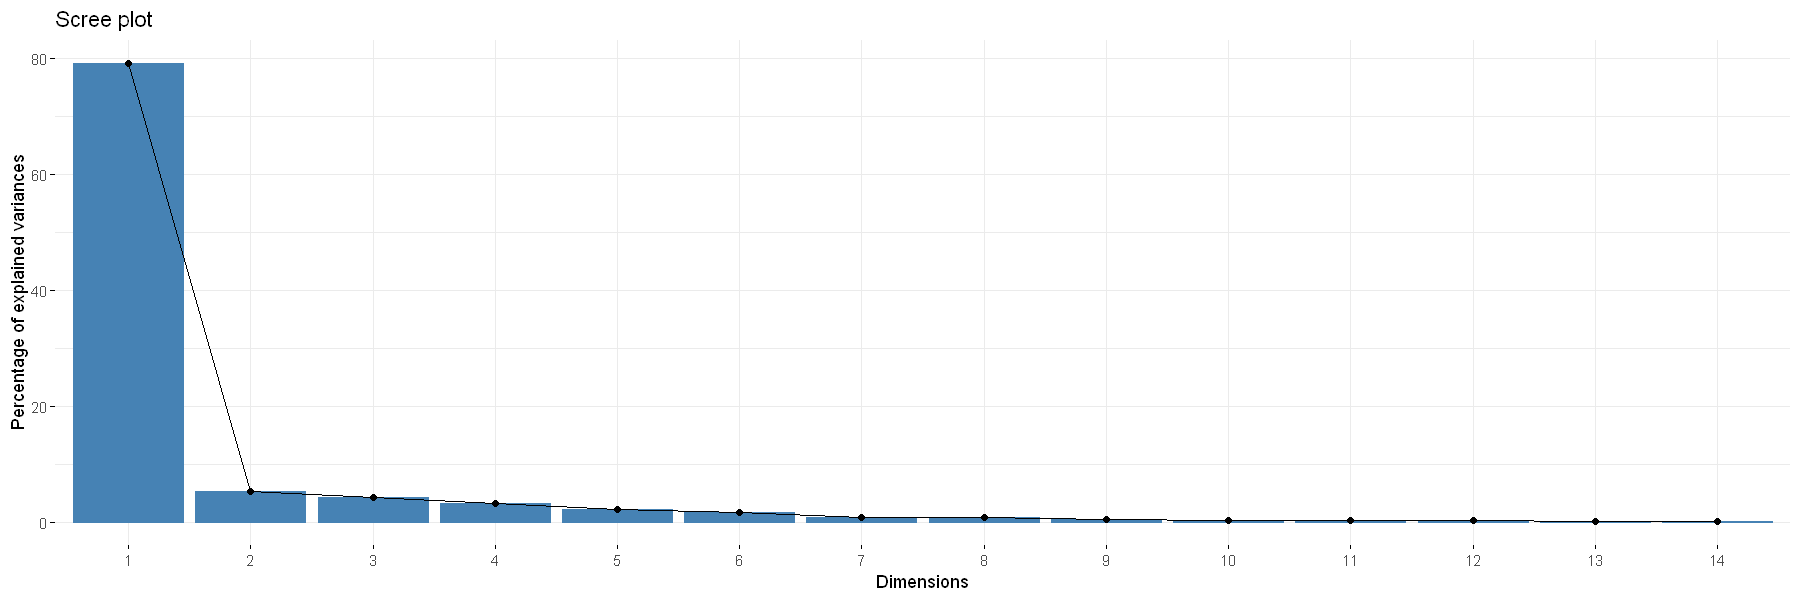

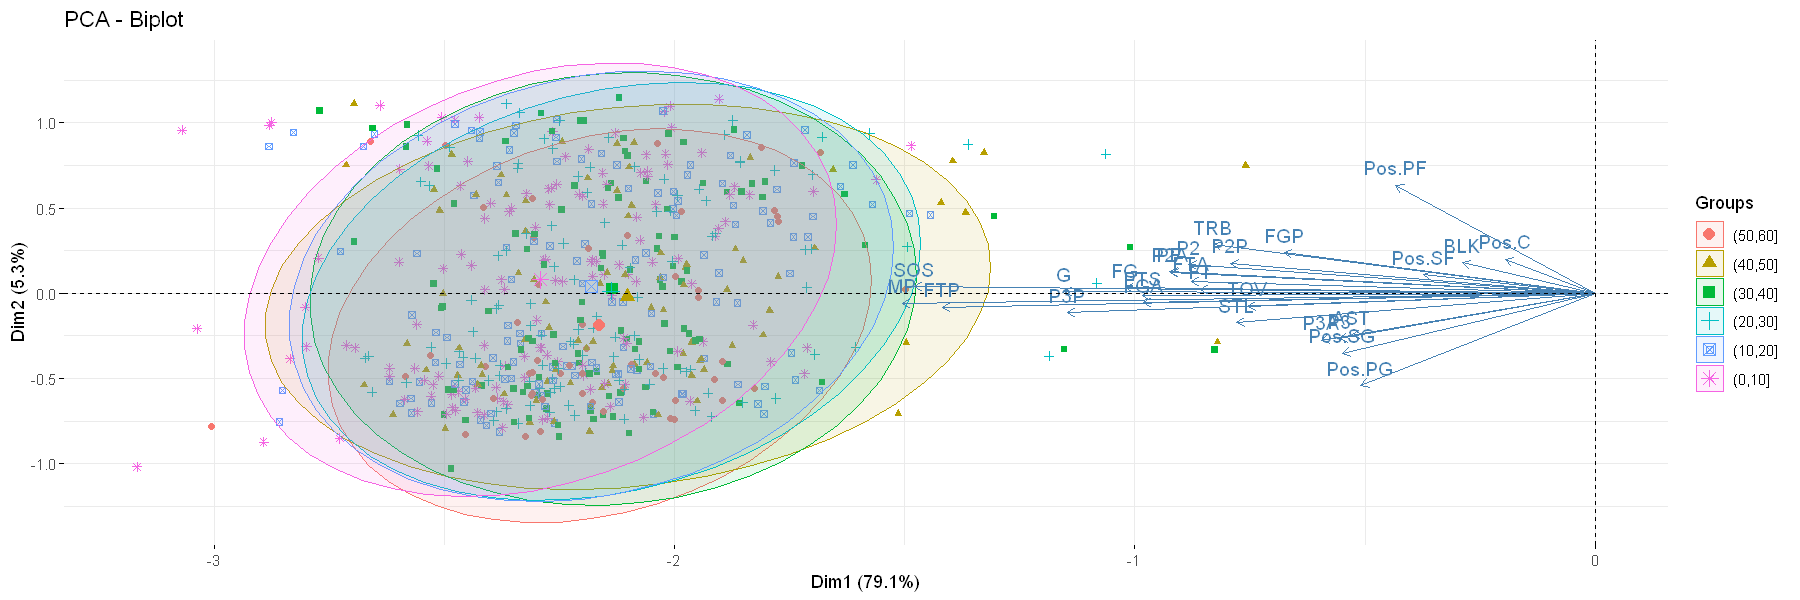

In [8]:
pca.remove <- unique(c(1:6,which(grepl("NBA",colnames(CollegeRookieStats.standardized))==TRUE)))
pca.data <- CollegeRookieStats.standardized[,-pca.remove]

DR <- c(which(colnames(pca.data)=="DraftRange"))
pca1 <- prcomp(pca.data[,-DR], center = FALSE, scale = FALSE)

summary(pca1)
fviz_eig(pca1,ncp=ncol(pca.data)/2)
fviz_pca_biplot(pca1, label="var", habillage=factor(pca.data$DraftRange,labels=c("(50,60]","(40,50]","(30,40]","(20,30]","(10,20]","(0,10]")), addEllipses=TRUE, ellipse.level=0.90)

There seems to be a GREAT deal of collinearity between ALL the variables. So much that it is hard for the model to distinguish variabiliy in any other degrees, and it does not map skill according to **DraftRange**.

##### PCA2

A solution to this is would be to do a PCA on components we absolutely know to have collinearity, and then we would use the PC(s) from that PCA in addition to the other variables exculded in the PCA. We definitely know **FG**, **FGA**, **FGP**, **P2**, **P2A**, **P2P**, **P3**, **P3A**, **P3P**, **FT**, **FTA**,  and **FTP** have collinearity with each other on multiple levels. It would be convienant to reduce the dimensions of this particular sect of the data. Let's do a PCA on these variables.

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.5407 0.33839 0.23520 0.14598 0.12859 0.10369 0.04290
Proportion of Variance 0.9146 0.04412 0.02131 0.00821 0.00637 0.00414 0.00071
Cumulative Proportion  0.9146 0.95874 0.98006 0.98827 0.99464 0.99878 0.99949
                           PC8     PC9    PC10     PC11     PC12
Standard deviation     0.02925 0.01493 0.01342 0.007771 0.002813
Proportion of Variance 0.00033 0.00009 0.00007 0.000020 0.000000
Cumulative Proportion  0.99982 0.99990 0.99997 1.000000 1.000000

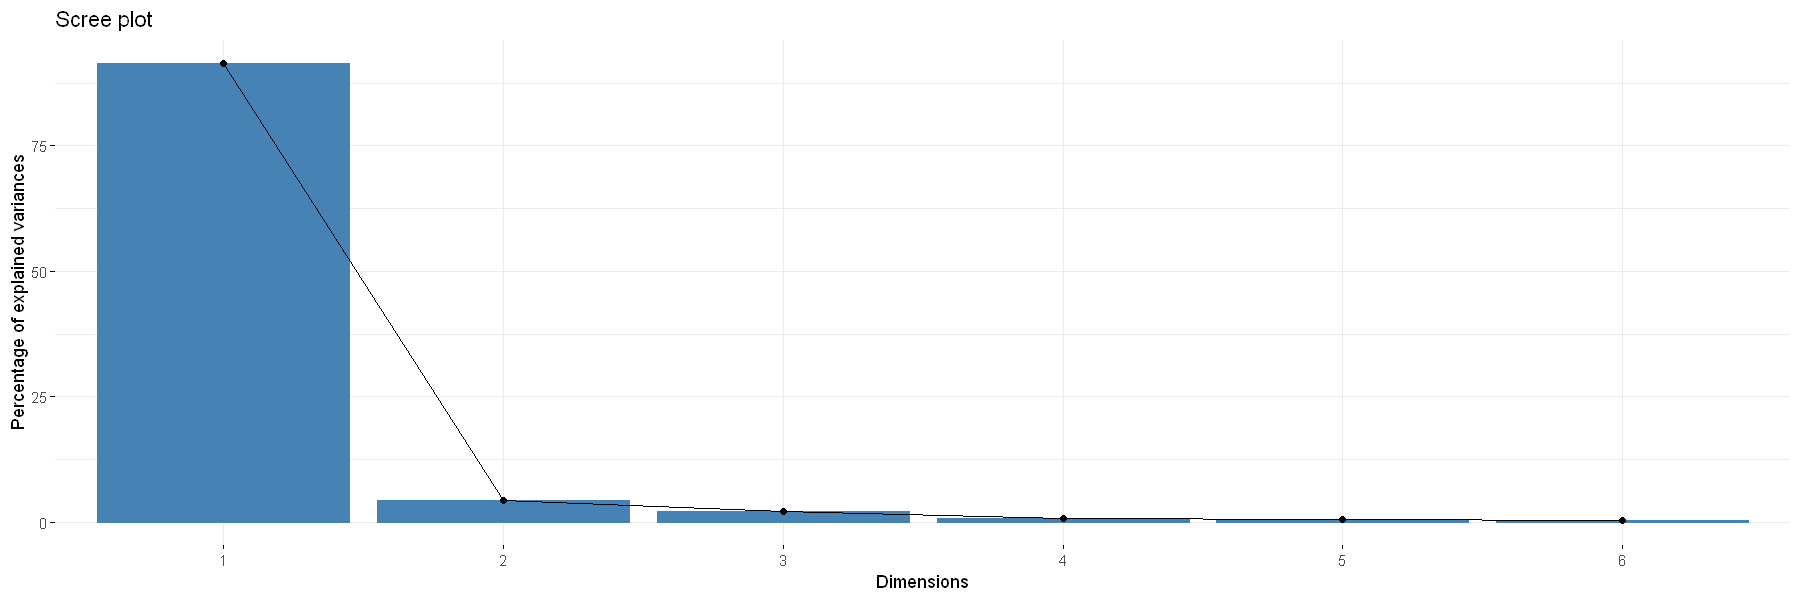

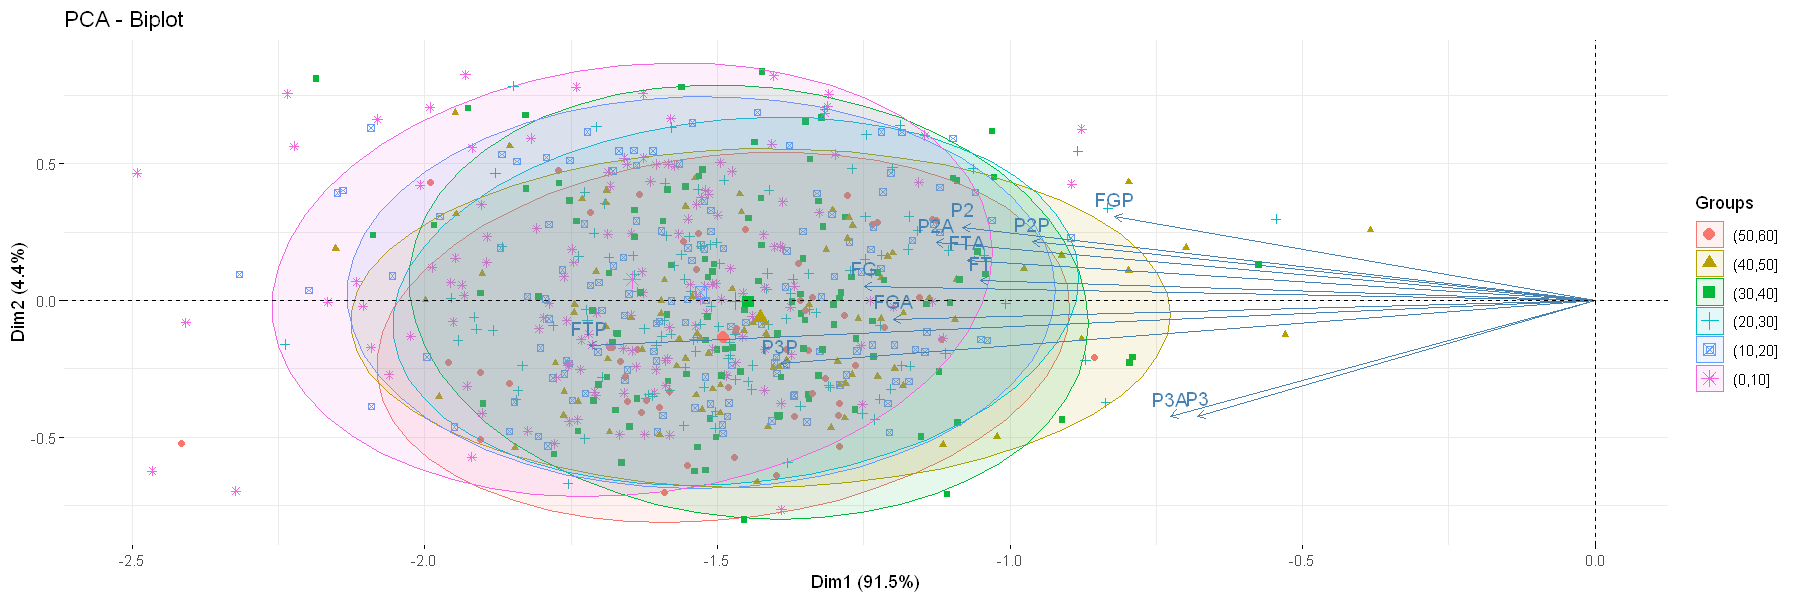

In [9]:
start <- which(colnames(CollegeRookieStats.standardized)=="FG")
stop <- which(colnames(CollegeRookieStats.standardized)=="FTP")
pca.use <- c(start:stop,which(colnames(CollegeRookieStats.standardized)=="DraftRange"))
pca.data <- CollegeRookieStats.standardized[,pca.use]

DR <- c(which(colnames(pca.data)=="DraftRange"))
pca2 <- prcomp(pca.data[,-DR], center = FALSE, scale = FALSE)

summary(pca2)
fviz_eig(pca2,ncp=ncol(pca.data)/2)
fviz_pca_biplot(pca2, label="var", habillage=factor(pca.data$DraftRange,labels=c("(50,60]","(40,50]","(30,40]","(20,30]","(10,20]","(0,10]")), addEllipses=TRUE, ellipse.level=0.90)

Unfortunately, the PCA doesn't seem to map skill amoung the players very well either. However, this is still usefull in the manner that it reduces the dimensionality of those variables we know to have collinearity. As 91.5% of the variance is explained by the first PC we can confidently reduce the variables to just one dimension for **FG**, **FGA**, **FGP**, **P2**, **P2A**, **P2P**, **P3**, **P3A**, **P3P**, **FT**, **FTA**,  and **FTP**.

##### PCA3

Before we stop our PCA examination, let's do one more. Let's do a PCA of the variablesin the first one but not in the ones above; that is: **G**, **MP**,  **TRB**, **AST**, **STL**, **BLK**, **TOV**, **PF**, **PTS**, **SOS**, **Pos.C**, **Pos.PF**, **Pos.PG**, **Pos.SF**, and **Pos.SG**. We don't expect these variables to have as much collinearity as the others. Thus, if we do a PCA analysis with these features, we hope to reduce the dimensionality but we don't want to reduce it to just one dimension. Let's start the analysis and see what the results are. 

Importance of components:
                          PC1     PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     1.5806 0.52196 0.50414 0.44346 0.3499 0.26530 0.19916
Proportion of Variance 0.7081 0.07722 0.07204 0.05574 0.0347 0.01995 0.01124
Cumulative Proportion  0.7081 0.78536 0.85740 0.91314 0.9478 0.96779 0.97903
                          PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.1367 0.12425 0.1128 0.09802 0.08132 0.07248 0.05776
Proportion of Variance 0.0053 0.00438 0.0036 0.00272 0.00187 0.00149 0.00095
Cumulative Proportion  0.9843 0.98870 0.9923 0.99503 0.99690 0.99839 0.99934
                          PC15
Standard deviation     0.04828
Proportion of Variance 0.00066
Cumulative Proportion  1.00000

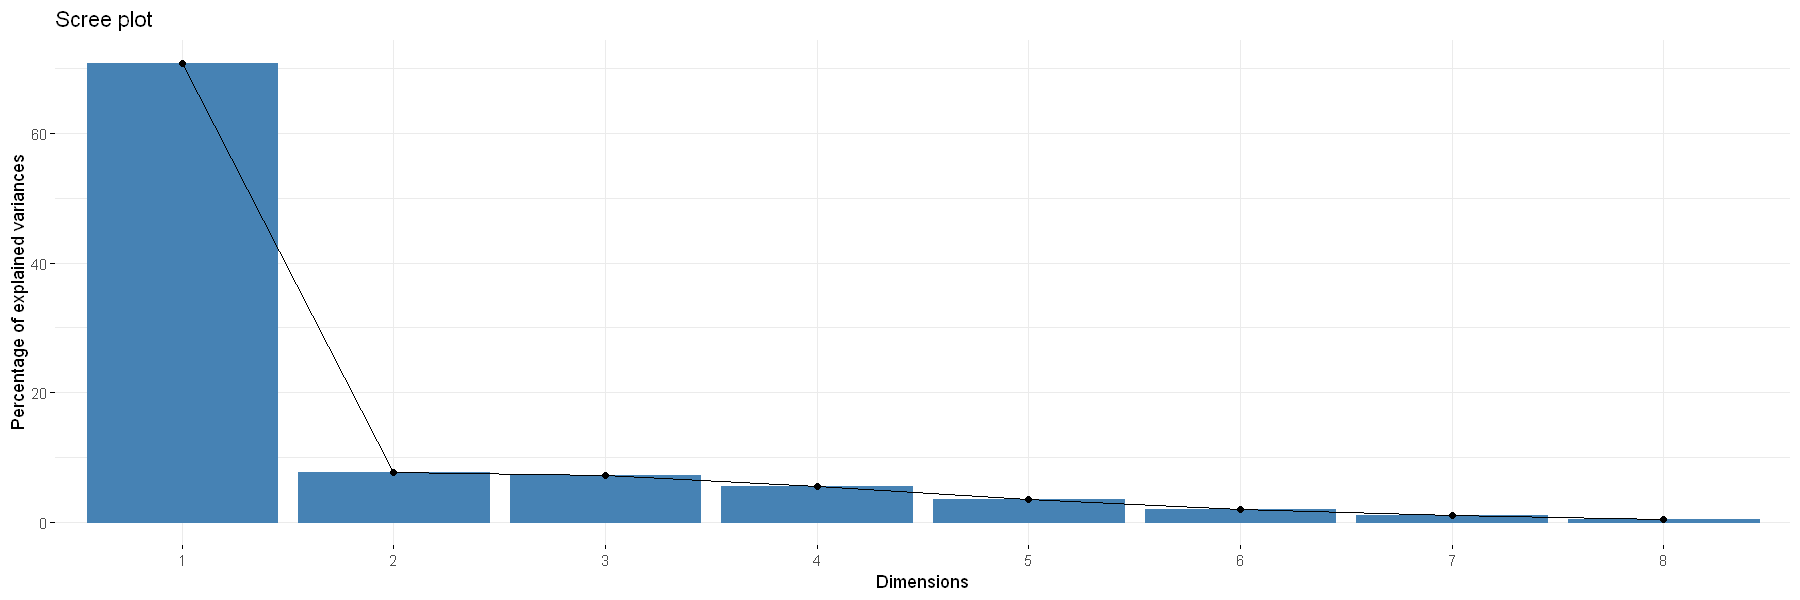

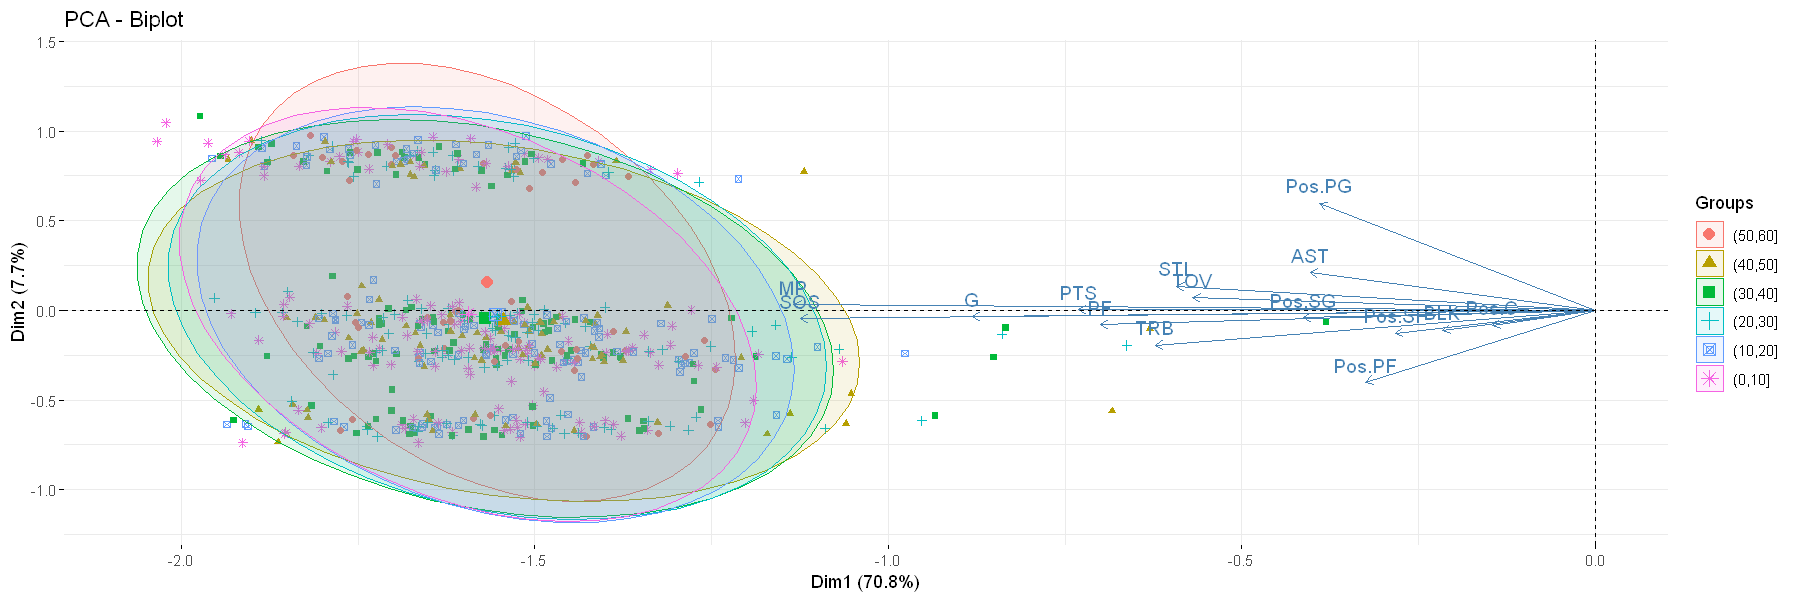

In [10]:
pca.remove <- unique(c(1:6,which(grepl("NBA",colnames(CollegeRookieStats.standardized))==TRUE)))
pca.remove <- unique(c(pca.remove,start:stop))
pca.data <- CollegeRookieStats.standardized[,-pca.remove]

DR <- c(which(colnames(pca.data)=="DraftRange"))
pca3 <- prcomp(pca.data[,-DR], center = FALSE, scale = FALSE)

summary(pca3)
fviz_eig(pca3,ncp=ncol(pca.data)/2)
fviz_pca_biplot(pca3, label="var", habillage=factor(pca.data$DraftRange,labels=c("(50,60]","(40,50]","(30,40]","(20,30]","(10,20]","(0,10]")), addEllipses=TRUE, ellipse.level=0.90)

As expected, the PCA suggests to use more than one PC for these variables. However, the first two PCs don't seem to map skill very well according to the biplot above.

##### PCA Conclusion

PCA1 should not be considered for modeling purposes. As it suggest to reduce the data to one dimension, that one dimension does not map skill very well according Draft Pick. Thus, there would not be enough variability in the data to predcit NBA stats.

PCA2 should be considered as replacment for **FG**, **FGA**, **FGP**, **P2**, **P2A**, **P2P**, **P3**, **P3A**, **P3P**, **FT**, **FTA**,  and **FTP**. Even though it cannot map skill very well, it does reduce the dimensionality of these variables that we know to have strong collinearity. I would strongly suggest using just the first PC for this PCA as it explains 91.5% of the total variability.

PCA3 may or may not prove to be worth using depending on it's performance in the modeling phase. It may be used in conjuction with PCA2 as the two PCAs have no overlap. However, this could still reduce the data to where there is not enough variablility to predict the NBA stats. Also, this PCA uses the same NBA stats from college, and reducing the dimensionality of this particular sect of the data could take away from the predictiability of our output data. Again, this data may or may not be worth using, but if one were to use this data, I strongly recommend to use at least the first two PCs as they cummulatively explain 78.5% of the total variability and as mentioned before, this is a particular sect of the data we would not want to reduce down too much.

Finally, since these PCAs will possibly get used with the standardized data, it would be beneficial to scale down the PC data.

#### Export the Data

Since we would like to use Python for the modeling and machine learning portion of the project let's export our results to csv. We will export our standardized data, PCA2 data, and the PCA3 data.

In [11]:
#Export Stanardized data
write.csv(CollegeRookieStats.standardized,"CollegeRookieStats_standardized.csv")

#Export PCA2 data
pca2.data <- pca2$x
for(col in colnames(pca2.data)) pca2.data[,col] <- (pca2.data[,col]-min(pca2.data[,col]))/(max(pca2.data[,col])-min(pca2.data[,col]))
CollegeRookieStats.pca2 <- data.frame(CollegeRookieStats.standardized[,1:6],pca2.data)[,1:10]
write.csv(CollegeRookieStats.pca2,"CollegeRookieStats_pca2.csv")

#Export PCA3 data 
pca3.data <- pca3$x
for(col in colnames(pca3.data)) pca3.data[,col] <- (pca3.data[,col]-min(pca3.data[,col]))/(max(pca3.data[,col])-min(pca3.data[,col]))
CollegeRookieStats.pca3 <- data.frame(CollegeRookieStats.standardized[,1:6],pca3.data)[,1:10]
write.csv(CollegeRookieStats.pca3,"CollegeRookieStats_pca3.csv")

# End of File